# Wrangle & Analyze Data


---
<a id='intro'></a>
## Introduction
The "We Rate Dogs" Twitter archive contains over 5000 tweets, which have been filtered to create the enhanced archive that forms the basis of this analysis. The goal of this project is to wrangle the data - gather, assess, and clean - into a tidy dataset, and then provide analyses and visualizations.

In [0]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import datetime
import random

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sns

# set the option to display the full string from a pandas DataFrame
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


---
<a id='gather'></a>
## Gather Data

### 1. Enhanced Twitter Archive

#### twitter-archive-enhanced.csv

> The WeRateDogs Twitter archive is provided as the starting point, and is download manually from the Udacity server: twitter_archive_enhanced.csv

In [0]:
# load the provided enhanced twitter archive file into a DataFrame
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [0]:
df_twitter_archive.head()

tweet_id  in_reply_to_status_id  ...  pupper puppo
0  892420643555336193 NaN                     ...  None    None
1  892177421306343426 NaN                     ...  None    None
2  891815181378084864 NaN                     ...  None    None
3  891689557279858688 NaN                     ...  None    None
4  891327558926688256 NaN                     ...  None    None

[5 rows x 17 columns]

##### Sample Tweet Data

Here is a sample of one of the tweets, with additional output to display the entire field's data.

In [0]:
sample_tweet = df_twitter_archive.iloc[2]
sample_tweet

tweet_id                      891815181378084864                                                                                                                               
in_reply_to_status_id         NaN                                                                                                                                              
in_reply_to_user_id           NaN                                                                                                                                              
timestamp                     2017-07-31 00:18:03 +0000                                                                                                                        
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                               
text                          This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never 

In [0]:
sample_tweet.text 

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'

### 2. Image Predictions File

#### image_predictions.tsv



In [0]:
# download the image predictions file with the provided link
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [0]:
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [0]:
#  HTTP status code 200 indicates the request has succeeded 
file_images = url.split('/')[-1]

with open(os.path.join('./', file_images), mode = 'wb') as file:
    file.write(response.content)

In [0]:
ls *.tsv

image-predictions.tsv


In [0]:
# read image predictions file into a DataFrame
df_predictions = pd.read_csv(file_images, sep = '\\t', engine = 'python')
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [0]:
df_predictions.head()

tweet_id  ... p3_dog
0  666020888022790149  ...  True 
1  666029285002620928  ...  True 
2  666033412701032449  ...  True 
3  666044226329800704  ...  True 
4  666049248165822465  ...  True 

[5 rows x 12 columns]

In [0]:
# check one observation
df_predictions.iloc[2]

tweet_id    666033412701032449                             
jpg_url     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
img_num     1                                              
p1          German_shepherd                                
p1_conf     0.596461                                       
p1_dog      True                                           
p2          malinois                                       
p2_conf     0.138584                                       
p2_dog      True                                           
p3          bloodhound                                     
p3_conf     0.116197                                       
p3_dog      True                                           
Name: 2, dtype: object

### 3. Download Tweet JSON Data

> Query the Twitter API using Python's Tweepy library to get the entire set of JSON data for each of the tweets in the WeRateDogs Twitter archive. Each tweet's JSON data is written to its own line in a file called tweet_json.txt file.

I would not like to use the twitter api for personal reasons. So I am using the already available tweet_json file

#### Read in JSON data to DataFrame
Extract the required fields from each tweet's JSON data and store in a separate file, tweet_data_extra.csv, for use during the assessment phase.

In [0]:
tweet_json_file = 'tweet_json.txt'
# read in the JSON data from the text file, and save to a DataFrame
tweet_json_data = []

with open(tweet_json_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
df_tweet_data_extra = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

df_tweet_data_extra.head(30)

tweet_id  retweet_count  favorite_count
0   892420643555336193  8330           38089         
1   892177421306343426  6154           32679         
2   891815181378084864  4073           24595         
3   891689557279858688  8474           41449         
4   891327558926688256  9167           39623         
5   891087950875897856  3052           19898         
6   890971913173991426  2024           11624         
7   890729181411237888  18488          64265         
8   890609185150312448  4190           27333         
9   890240255349198849  7229           31363         
10  890006608113172480  7186           30142         
11  889880896479866881  4877           27316         
12  889665388333682689  9856           47282         
13  889638837579907072  4447           26686         
14  889531135344209921  2202           14853         
15  889278841981685760  5266           24813         
16  888917238123831296  4407           28615         
17  888804989199671297  4206           25117         
18  888554962724278272  3481           19490         
19  888078434458587136  3423           21380         
20  887705289381826560  5278           29663         
21  887517139158093824  11446          45486         
22  887473957103951883  17816          67895         
23  887343217045368832  10196          33113         
24  887101392804085760  5849           30059         
25  886983233522544640  7620           34571         
26  886736880519319552  3218           11848         
27  886680336477933568  4372           22051         
28  886366144734445568  3139           20829         
29  886267009285017600  4              115

In [0]:
df_tweet_data_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2340 non-null   int64
 1   retweet_count   2340 non-null   int64
 2   favorite_count  2340 non-null   int64
dtypes: int64(3)
memory usage: 55.0 KB


In [0]:
df_tweet_data_extra.to_csv('tweet_data_extra.csv', index = False)

---
<a id='assess'></a>
## Assess Data
In this section I assess the data that was gathered, both visually and programmatically for quality and tidiness issues. One of the key points for the analysis requires that only tweets with original ratings with images, no retweets, be retained.

The quality of data is assessed against dimensions or criteria concerning the content: completeness, validity, accuracy and consistency.

Tidiness of data is assessed with regard to structure according to the rules defined by Hadley Wikham.

<a id='summary'></a>

---
## Assessment Summary

### Quality

### `archive`

1.There are 181 retweets (**retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**).

2.There are 78 reply tweets (**in_reply_to_status_id, in_reply_to_user_id**).

3.There are 2297 tweets with **expanded_urls** (links to the tweet), indicating 59 tweets with missing data.
56 of these tweets are replies or retweets.
The remaining 3 tweets have not got the url within the **text** column. They are NOT in the **predictions** table, but even though they ARE in the **json_data**, there was NO image url in the JSON data.

4.The **timestamp** column is in string format.

5.There are 109 tweets with regular words in the **name** column that are NOT a valid name; these words are always the 3rd word in the tweet and are all lowercase; all valid names start with an uppercase letter.

6.There are 775 tweets with the dog **name** as "None". (Probably not worth looking at as there are too many to verify.) [_**This issue will not be cleaned**_]

7.There are only 4 types of values in the **source** column, and they can be simplified by using the display string portion just before the final "<\a>":
  - Twitter for iPhone
  - Vine - Make a Scene
  - Twitter Web Client
  - TweetDeck 

### `predictions`

8.There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".  

### `json_data`
9.Several tweets (16 _during this run_) from the original `archive` table have been deleted since the archive was created (TweepErrors were reported). 


### Tidiness

### `archive`

1.There are 4 columns for dog stages (**doggo, floofer, pupper, puppo**). The 4 columns for one variable doesn't conform to the rules of "tidy data". 

2.The **Key Points** indicates that we’re only interested in “original tweets”, no “retweets”; this data is stored in the columns **retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**.

3.Reply tweets are also not “original tweets” either; this data is stored in the columns **in_reply_to_status_id, in_reply_to_user_id**.

4. When all **rating_denominator**s are the same (10) this column is no longer needed.

5. Columns with numerical data are located to the far right of the table, which makes it difficult to readily see the data that will be used for analyses.

### `predictions`

1.The table does not follow the rules of “Tidy Data”; the columns **p1**, **p2** and **p3** contain the same type of data, predictions. The columns **p1_conf**, **p2_conf** and **p3_conf** all contain values for confidence level, and columns **p1_dog**, **p2_dog** and **p3_dog** all contain Boolean values indicating whether the prediction is in fact a type of dog. [_**This issue will not be cleaned**_]

2. The column **jpg_url** contains a link to an image file (JPG), but it’s not the same link as the **expanded_urls**  field in the `archive` dataset. It is actually the same link as the **media_url_https** field in the tweet’s JSON data. [_**This issue will not be cleaned**_]

3. The dog breed prediction with the highest confidence level can be combined with the  `archive` table as the twitter table contains information that is all about the dog in the tweet.

### `json_data`

1.The `json_data` table should be combined with the `archive` table.


In [0]:
# Load the data gathered data files
archive = pd.read_csv('twitter-archive-enhanced.csv')
predictions = pd.read_csv('image-predictions.tsv', sep = '\\t', engine = 'python')
json_data = pd.read_csv('tweet_data_extra.csv')

<a id='assess_archive'></a>
### `archive`

In [0]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

---
**NOTES:**

The `info()` method reveals several quality and tidiness issues:

- There are 181 retweets (**retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**)
- There are 78 replies (**in_reply_to_status_id, in_reply_to_user_id**)
- There are 2297 tweets with **expanded_urls** (links to images) indicating 59 tweets with missing data
- The **timestamp** field is in string format (object)
- There are 4 columns for dog stages (**doggo, floofer, pupper, puppo**)
- The columns related to retweets are not applicable for original tweets
- The columns related to replies are not applicable for original tweets

In [0]:
print("Data type for timestamp:  " + str(type(archive.timestamp[0])))

Data type for timestamp:  <class 'str'>


In [0]:
print("Duplicated:  {}".format(sum(archive.duplicated())))

Duplicated:  0


In [0]:
archive.head(10)

tweet_id  in_reply_to_status_id  ...  pupper puppo
0  892420643555336193 NaN                     ...  None    None
1  892177421306343426 NaN                     ...  None    None
2  891815181378084864 NaN                     ...  None    None
3  891689557279858688 NaN                     ...  None    None
4  891327558926688256 NaN                     ...  None    None
5  891087950875897856 NaN                     ...  None    None
6  890971913173991426 NaN                     ...  None    None
7  890729181411237888 NaN                     ...  None    None
8  890609185150312448 NaN                     ...  None    None
9  890240255349198849 NaN                     ...  None    None

[10 rows x 17 columns]

In [0]:
archive.tail(10)

tweet_id  in_reply_to_status_id  ...  pupper puppo
2346  666058600524156928 NaN                     ...  None    None
2347  666057090499244032 NaN                     ...  None    None
2348  666055525042405380 NaN                     ...  None    None
2349  666051853826850816 NaN                     ...  None    None
2350  666050758794694657 NaN                     ...  None    None
2351  666049248165822465 NaN                     ...  None    None
2352  666044226329800704 NaN                     ...  None    None
2353  666033412701032449 NaN                     ...  None    None
2354  666029285002620928 NaN                     ...  None    None
2355  666020888022790149 NaN                     ...  None    None

[10 rows x 17 columns]

**NOTES:**
> The `head()` and `tail()` methods show us several issues:
>
> Quality:
> - The **timestamp** column has dates in string form.
> - Some of the rows from the `tail()` output above have invalid strings in the **name** column, e.g. "a", "an", "in". These words are all the 3rd word in the tweet.
> - Values of "None" in the **name** column.
>
> Tidiness:
> - The columns with numerical data that are typically used for analysis are located to the far right of the table, and the columns with long strings are on the left; this makes it difficult to readily see the data that will be used for analyses.

---
#### `name`
> First we'll check the **name** column, starting with value counts.

In [0]:
archive.name.value_counts().head(50)

None       745
a          55 
Charlie    12 
Lucy       11 
Cooper     11 
Oliver     11 
Penny      10 
Tucker     10 
Lola       10 
Winston    9  
Bo         9  
the        8  
Sadie      8  
an         7  
Bailey     7  
Buddy      7  
Daisy      7  
Toby       7  
Leo        6  
Jack       6  
Koda       6  
Rusty      6  
Milo       6  
Oscar      6  
Scout      6  
Bella      6  
Dave       6  
Jax        6  
Stanley    6  
Chester    5  
very       5  
Sammy      5  
Larry      5  
Phil       5  
Sunny      5  
George     5  
Finn       5  
Gus        5  
Alfie      5  
Louis      5  
Bentley    5  
Oakley     5  
Maddie     4  
Walter     4  
Hank       4  
Carl       4  
just       4  
Riley      4  
Brody      4  
Reggie     4  
Name: name, dtype: int64

**NOTES:**

> It looks like the dog names are all capitalized, so words that begin in lowercase are probably not names, like "a", "the" and "an". Here's the list of these "names".

In [0]:
# list all names that are NOT capitalized
err_names_mask = archive.name.str.contains('^[a-z]', regex = True)
archive[err_names_mask].name.value_counts().sort_index()

a               55
actually        2 
all             1 
an              7 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            4 
life            1 
light           1 
mad             2 
my              1 
not             2 
officially      1 
old             1 
one             4 
quite           4 
space           1 
such            1 
the             8 
this            1 
unacceptable    1 
very            5 
Name: name, dtype: int64

In [0]:
len(archive[err_names_mask])

109

**NOTES:**

> This list contains non-capitalized words from the **name** column for 109 tweets, none of which are a valid name.

---
#### `expanded_urls`
> Next, check the tweets that are missing data in **expanded_urls**, are they replies or retweets?

In [0]:
# number of tweets with missing urls
sum(archive.expanded_urls.isna())

59

In [0]:
# how many tweets with missing urls are replies or retweets?
sum(archive.expanded_urls.isna() & \
    (archive.in_reply_to_status_id.notnull() | \
     archive.retweeted_status_id.notnull()))

56

In [0]:
# display tweets that are missing urls, and are NOT replies and are NOT retweets
mask = archive.expanded_urls.isna() & \
       archive.in_reply_to_status_id.isna() & \
       archive.retweeted_status_id.isna()
archive[mask][['tweet_id', 'text', 'expanded_urls']]

tweet_id  ... expanded_urls
375   828361771580813312  ...  NaN         
707   785515384317313025  ...  NaN         
1445  696518437233913856  ...  NaN         

[3 rows x 3 columns]

**NOTES:**

> Of the 59 tweets that are missing data in **expanded_urls**, 56 are replies or retweets. The remaining 3 tweets (at indexes 375, 707 and 1445) with NaN in the **expanded_urls** column all have valid ratings but no urls within the **text** column.
>
> The question now is whether these tweets are part of the **predictions** or **json_data** tables.

In [0]:
# are any of these tweets in the predictions table?
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = predictions.tweet_id.isin(tweet_set)
sum(find_tweet_id)

0

In [0]:
# are any of these tweets in the json_data table?
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = json_data.tweet_id.isin(tweet_set)
json_data[find_tweet_id]

tweet_id  retweet_count  favorite_count
366   828361771580813312  184            2323          
695   785515384317313025  1376           6527          
1430  696518437233913856  1814           4086

#### `source`

In [0]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

**NOTES:**
> There are only 4 types of sources, and they can be simplified by using the display string portion just before the final "<\a>":
 - Twitter for iPhone
 - Vine - Make a Scene
 - Twitter Web Client
 - TweetDeck

#### `doggo`, `floofer`, `pupper`, and `puppo`

In [0]:
archive.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [0]:
archive.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [0]:
archive.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [0]:
archive.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [0]:
archive[archive.floofer == 'floofer'].text

46      Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP 
200     At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
582     This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5                                         
774     Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744                                    
984     This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB                         
1022    Here's a golden floofer helping with the groceries. Bed got in way. Still 11/10 helpful af (vid by @categoen) https://t.co/6ZRo

**NOTES:**
> Using the floofer category as an example, it looks like there are a few ways that this type is spelled: "floofer", "floofiest", and "Floofer".  
The other dog stage types may be similar in the variety of spelling.

---
<a id='assess_predictions'></a>
### `predictions`

In [0]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [0]:
predictions.head(20)

tweet_id  ... p3_dog
0   666020888022790149  ...  True 
1   666029285002620928  ...  True 
2   666033412701032449  ...  True 
3   666044226329800704  ...  True 
4   666049248165822465  ...  True 
5   666050758794694657  ...  True 
6   666051853826850816  ...  False
7   666055525042405380  ...  False
8   666057090499244032  ...  True 
9   666058600524156928  ...  True 
10  666063827256086533  ...  True 
11  666071193221509120  ...  True 
12  666073100786774016  ...  True 
13  666082916733198337  ...  True 
14  666094000022159362  ...  True 
15  666099513787052032  ...  True 
16  666102155909144576  ...  True 
17  666104133288665088  ...  False
18  666268910803644416  ...  False
19  666273097616637952  ...  True 

[20 rows x 12 columns]

In [0]:
predictions.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [0]:
predictions.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [0]:
predictions.p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

In [0]:
# check out 20 of the entries that don't predict dogs
predictions[~predictions.p1_dog & \
               ~predictions.p2_dog & \
               ~predictions.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head(20)

tweet_id                p1  ...                  p3 p3_dog
6    666051853826850816  box_turtle        ...  terrapin            False
17   666104133288665088  hen               ...  partridge           False
18   666268910803644416  desktop_computer  ...  bookcase            False
21   666293911632134144  three-toed_sloth  ...  great_grey_owl      False
25   666362758909284353  guinea_pig        ...  hamster             False
29   666411507551481857  coho              ...  gar                 False
45   666786068205871104  snail             ...  acorn               False
50   666837028449972224  triceratops       ...  common_iguana       False
51   666983947667116034  swab              ...  wig                 False
53   667012601033924608  hyena             ...  coyote              False
56   667065535570550784  jigsaw_puzzle     ...  space_heater        False
69   667188689915760640  vacuum            ...  toilet_tissue       False
73   667369227918143488  teddy             ...  Christmas_stocking  False
77   667437278097252352  porcupine         ...  badger              False
78   667443425659232256  goose             ...  hen                 False
93   667549055577362432  electric_fan      ...  lampshade           False
94   667550882905632768  web_site          ...  oscilloscope        False
96   667724302356258817  ibex              ...  ram                 False
98   667766675769573376  fire_engine       ...  jeep                False
100  667782464991965184  lorikeet          ...  African_grey        False

[20 rows x 7 columns]

In [0]:
sum(~predictions.p1_dog & \
    ~predictions.p2_dog & \
    ~predictions.p3_dog)

324

**NOTES:**
> In each of the prediction columns there are over 500 instances where the algorithm did not predict a dog breed from the image. When combined, there are 324 cases where there is NO valid dog breed from any of the three predictions.
>
> The best prediction for dog breed could be combined with the twitter archive table; this is essentially another variable pertaining to the dog on which the archive is based.

---
<a id='assess_json_data'></a>
### `json_data`

In [0]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2340 non-null   int64
 1   retweet_count   2340 non-null   int64
 2   favorite_count  2340 non-null   int64
dtypes: int64(3)
memory usage: 55.0 KB


In [0]:
json_data.head(20)

tweet_id  retweet_count  favorite_count
0   892420643555336193  8330           38089         
1   892177421306343426  6154           32679         
2   891815181378084864  4073           24595         
3   891689557279858688  8474           41449         
4   891327558926688256  9167           39623         
5   891087950875897856  3052           19898         
6   890971913173991426  2024           11624         
7   890729181411237888  18488          64265         
8   890609185150312448  4190           27333         
9   890240255349198849  7229           31363         
10  890006608113172480  7186           30142         
11  889880896479866881  4877           27316         
12  889665388333682689  9856           47282         
13  889638837579907072  4447           26686         
14  889531135344209921  2202           14853         
15  889278841981685760  5266           24813         
16  888917238123831296  4407           28615         
17  888804989199671297  4206           25117         
18  888554962724278272  3481           19490         
19  888078434458587136  3423           21380

In [0]:
json_data.describe()

tweet_id  retweet_count  favorite_count
count  2.340000e+03  2340.000000    2340.000000   
mean   7.422176e+17  2934.637607    7976.021795   
std    6.832564e+16  4943.049421    12350.111679  
min    6.660209e+17  0.000000       0.000000      
25%    6.783394e+17  590.000000     1377.500000   
50%    7.186224e+17  1371.000000    3470.500000   
75%    7.986954e+17  3420.750000    9766.250000   
max    8.924206e+17  83795.000000   164524.000000

<a id='clean'></a>

---
## Clean Data

In [0]:
# create copies of the dataframes for cleaning
archive_clean = archive.copy()
predictions_clean = predictions.copy()
json_data_clean = json_data.copy()

In [0]:
len_archive = archive_clean.shape[0]; len_archive

2356


There are 181 retweets, and we’re only interested in “original tweets”.

##### Define
> Drop all rows containing retweets, where these columns will be non-null: `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`.

##### Code

In [0]:
print("# of retweets:  {}".format(sum(archive_clean.retweeted_status_id.notnull())))

# of retweets:  181


In [0]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]

##### Test

In [0]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [0]:
# confirm the rows are dropped; compare with original table length
print("# of rows dropped:  {}".format(len_archive - archive_clean.shape[0]))
# reset the variable for length of the archive
len_archive = archive_clean.shape[0]

# of rows dropped:  181



There are 78 reply tweets; we’re only interested in “original tweets”.

##### Define
> Drop all rows that are replies, those that have non-null values in these columns: `in_reply_to_status_id` and `in_reply_to_user_id`.
##### Code

In [0]:
print("# of replies:  {}".format(sum(archive_clean.in_reply_to_status_id.notnull())))

# of replies:  78


In [0]:
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isna()]

##### Test

In [0]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [0]:
# confirm the rows are dropped; compare with previous table length
print("# of rows dropped:  {}".format(len_archive - archive_clean.shape[0]))
# reset the variable for length of the archive
len_archive = archive_clean.shape[0]

# of rows dropped:  78



All columns related to “retweets” will be empty (we're not interested in retweets).

##### Define
> Since we don't want retweets, we can drop all columns related to retweets: `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.

##### Code

In [0]:
archive_clean = archive_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

##### Test

In [0]:
# Confirm all retweet related columns are gone
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']


All columns related to “replies” will be empty (we're not interested in replies).


##### Define
> Drop all columns related to replies: `in_reply_to_status_id` and `in_reply_to_user_id`.
##### Code

In [0]:
archive_clean = archive_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

##### Test

In [0]:
# Confirm all reply related columns are gone
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

.
The *timestamp* column is in string format, it's the wrong data type.

##### Define
> Convert `timestamp` to datetime data type.
##### Code

In [0]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)
archive_clean['timestamp'] = archive_clean.timestamp.dt.floor('s')

##### Test

In [0]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3


The *source* column can be simplified by extracting and replacing with it's display string.

#### Define
> Replace the `source` string with the display portion of itself. Extract the string between `<a href="">` and `</a>`.
#### Code

In [0]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [0]:
archive_clean['source'] = archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [0]:
archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64


Some tweets have wrong values extracted for rating; text contains the tweeter's rating.

##### Define
> Manual fix:
- 740373189193256964: replace 9/11 with 14/10
- 716439118184652801: replace 50/50 with 11/10
- 682962037429899265: replace 7/11 with 10/10
- 666287406224695296: replace 1/2 with 9/10

##### Code

In [0]:
mask_row = archive_clean.tweet_id == 740373189193256964
archive_clean.loc[mask_row, 'rating_numerator'] = 14
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [0]:
mask_row = archive_clean.tweet_id == 716439118184652801
archive_clean.loc[mask_row, 'rating_numerator'] = 11
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [0]:
mask_row = archive_clean.tweet_id == 682962037429899265
archive_clean.loc[mask_row, 'rating_numerator'] = 10
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [0]:
mask_row = archive_clean.tweet_id == 666287406224695296
archive_clean.loc[mask_row, 'rating_numerator'] = 9
archive_clean.loc[mask_row, 'rating_denominator'] = 10

##### Test

In [0]:
mask_cols = ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']
archive_clean[(archive_clean.tweet_id == 740373189193256964) | \
              (archive_clean.tweet_id == 716439118184652801) | \
              (archive_clean.tweet_id == 682962037429899265) | \
              (archive_clean.tweet_id == 666287406224695296) ][mask_cols]

tweet_id  ... rating_denominator
1068  740373189193256964  ...  10               
1202  716439118184652801  ...  10               
1662  682962037429899265  ...  10               
2335  666287406224695296  ...  10               

[4 rows x 4 columns]


Some tweets with *rating_denominator* NOT equal to 10; multiple dogs or no valid rating.

##### Define
> Drop the remaining tweets with `rating_denominator` values that are NOT equal to 10.
##### Code

In [0]:
# display denominators
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

170    1   
150    1   
120    1   
110    1   
90     1   
80     2   
70     1   
50     2   
40     1   
20     1   
10     2084
7      1   
Name: rating_denominator, dtype: int64

In [0]:
archive_clean = archive_clean[archive_clean.rating_denominator == 10]

##### Test

In [0]:
# check the values in the column - should only be "10"
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    2084
Name: rating_denominator, dtype: int64


There are 5 tweets with *rating_numerator* >= 15, which either don't make sense or are huge.

##### Define
> Drop tweets that have `rating_numerator` >= 15.
##### Code

In [0]:
# display numerators greater than 15
mask = archive_clean.rating_numerator >= 15
archive_clean[mask].rating_numerator.value_counts().sort_index(ascending = False)

1776    1
420     1
75      1
27      1
26      1
Name: rating_numerator, dtype: int64

In [0]:
archive_clean = archive_clean[archive_clean.rating_numerator < 15]

##### Test

In [0]:
# display ALL numerators
archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

14    39 
13    287
12    486
11    414
10    437
9     153
8     98 
7     51 
6     32 
5     34 
4     15 
3     19 
2     9  
1     4  
0     1  
Name: rating_numerator, dtype: int64


Tweets with missing data in *expanded_urls* (links to the tweet).

##### Define
> Drop tweets with missing data in the `expanded_urls`.
##### Code

In [0]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2079 non-null   int64              
 1   timestamp           2079 non-null   datetime64[ns, UTC]
 2   source              2079 non-null   object             
 3   text                2079 non-null   object             
 4   expanded_urls       2076 non-null   object             
 5   rating_numerator    2079 non-null   int64              
 6   rating_denominator  2079 non-null   int64              
 7   name                2079 non-null   object             
 8   doggo               2079 non-null   object             
 9   floofer             2079 non-null   object             
 10  pupper              2079 non-null   object             
 11  puppo               2079 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [0]:
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

##### Test

In [0]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2076 non-null   int64              
 1   timestamp           2076 non-null   datetime64[ns, UTC]
 2   source              2076 non-null   object             
 3   text                2076 non-null   object             
 4   expanded_urls       2076 non-null   object             
 5   rating_numerator    2076 non-null   int64              
 6   rating_denominator  2076 non-null   int64              
 7   name                2076 non-null   object             
 8   doggo               2076 non-null   object             
 9   floofer             2076 non-null   object             
 10  pupper              2076 non-null   object             
 11  puppo               2076 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3


There are 4 columns for dog stages: `doggo`, `floofer`, `pupper`, `puppo`.

##### Define
> Melt the 4 columns with the dog stages:
 - Create a temporary column called `none` to store the `None` values; use lowercase 'n' to avoid confusion with 'None' special NA value.
 - Create a new column `stage` to store the categories: `doggo`, `floofer`, `pupper`, `puppo`, as well as `None`, and select the stage from the column that contains a value.
 - Cast the `stage` column to categorical data type.
 - Drop the 4 original dog stage columns, and the temporary `none` column.

##### Code

In [0]:
archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

doggo floofer pupper puppo
count   2076  2076    2076   2076
unique  2     2       2      2   
top     None  None    None   None
freq    1993  2066    1848   2052

**NOTE:**
> From the describe() output here, I'm going to order the dog stages by count, in increasing order: floofer, puppo, doggo and pupper.

In [0]:
# replace the stage name with 1, and 'None' with 0, like a dummy variable
make_dummy = lambda x: 0 if x == 'None' else 1

archive_clean.doggo = archive_clean.doggo.apply(make_dummy)
archive_clean.floofer = archive_clean.floofer.apply(make_dummy)
archive_clean.pupper = archive_clean.pupper.apply(make_dummy)
archive_clean.puppo = archive_clean.puppo.apply(make_dummy)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
archive_clean['none'] = archive_clean['doggo'] + archive_clean['floofer'] + \
                        archive_clean['pupper'] + archive_clean['puppo']

# have a look at what we have before we continue...
archive_clean['none'].value_counts()

0    1742
1    323 
2    11  
Name: none, dtype: int64

**NOTE:**
> Here we have a little surprise! Turns out there are 11 tweets that have 2 dog stages set, so these must be tweets about multiple dogs. As there are only 11 entries, I'll just carry on with selecting the first of the dog stages in increasing count order - floofer, puppo, doggo and pupper - so we don't loose too much information.

In [0]:
# if there are NO stages specified then set 'None' to 1
stage_none = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
archive_clean['none'] = archive_clean['none'].apply(stage_none)

# Order the stages in increasing count order: floofer, puppo, doggo and pupper
# set the choice order for dog stage based on count order
stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (archive_clean[stage[0]] == 1),
    (archive_clean[stage[1]] == 1),
    (archive_clean[stage[2]] == 1),
    (archive_clean[stage[3]] == 1),
    (archive_clean[stage[4]] == 1)]

# select the dog stage based on the first successful condition; stage[4] is 'None'
archive_clean['stage'] = np.select(conditions, stage, default = stage[4])

# now we can drop the original 4 dog stage columns, AND the temporary 'None'
archive_clean.drop(stage, axis = 1, inplace = True)

# set the 'stage' column data type to category
archive_clean['stage'] = archive_clean.stage.astype('category')

# Source for algorithm:    https://code.i-harness.com/en/q/19c9fbc

##### Test

In [0]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2076 non-null   int64              
 1   timestamp           2076 non-null   datetime64[ns, UTC]
 2   source              2076 non-null   object             
 3   text                2076 non-null   object             
 4   expanded_urls       2076 non-null   object             
 5   rating_numerator    2076 non-null   int64              
 6   rating_denominator  2076 non-null   int64              
 7   name                2076 non-null   object             
 8   stage               2076 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 148.2+ KB


In [0]:
archive_clean.stage.value_counts()

none       1742
pupper     219 
doggo      81  
puppo      24  
floofer    10  
Name: stage, dtype: int64


The `json_data` table should be part of the `archive` table.

There is also missing data for these fields which is handled in the **Additional Cleaning** part just below.

##### Define
> Merge the `retweet_count` and `favorite_count` columns to the **archive** table, joining on `tweet_id`.
##### Code

In [0]:
json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2340 non-null   int64
 1   retweet_count   2340 non-null   int64
 2   favorite_count  2340 non-null   int64
dtypes: int64(3)
memory usage: 55.0 KB


In [0]:
archive_clean = pd.merge(archive_clean, json_data_clean, 
                         on = 'tweet_id', how = 'left')

##### Test

In [0]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2075
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2076 non-null   int64              
 1   timestamp           2076 non-null   datetime64[ns, UTC]
 2   source              2076 non-null   object             
 3   text                2076 non-null   object             
 4   expanded_urls       2076 non-null   object             
 5   rating_numerator    2076 non-null   int64              
 6   rating_denominator  2076 non-null   int64              
 7   name                2076 non-null   object             
 8   stage               2076 non-null   category           
 9   retweet_count       2074 non-null   float64            
 10  favorite_count      2074 non-null   float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(3), object(4)
memory usage: 180.6+ KB

#### Additional Cleaning
The merge of the **json_data** table with the **archive** table caused the data types for `retweet_count` and `favorite_count` to change from int64 to float64. There is also missing data for these fields.

##### Define
> - Drop tweets with missing **json_data**.
> - Change the data type for the `retweet_count` and `favorite_count` to be int.
##### Code

In [0]:
mask_cols = ['tweet_id', 'retweet_count', 'favorite_count']
archive_clean[archive_clean.retweet_count.isna() | archive_clean.favorite_count.isna()][mask_cols]

tweet_id  retweet_count  favorite_count
720   754011816964026368 NaN            NaN            
1470  680055455951884288 NaN            NaN

In [0]:
archive_clean = archive_clean[~(archive_clean.retweet_count.isna() | archive_clean.favorite_count.isna())]

# recast the count columns to int type
archive_clean.retweet_count = archive_clean.retweet_count.astype(int)
archive_clean.favorite_count = archive_clean.favorite_count.astype(int)

##### Test

In [0]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2075
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2074 non-null   int64              
 1   timestamp           2074 non-null   datetime64[ns, UTC]
 2   source              2074 non-null   object             
 3   text                2074 non-null   object             
 4   expanded_urls       2074 non-null   object             
 5   rating_numerator    2074 non-null   int64              
 6   rating_denominator  2074 non-null   int64              
 7   name                2074 non-null   object             
 8   stage               2074 non-null   category           
 9   retweet_count       2074 non-null   int64              
 10  favorite_count      2074 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 180.5+ KB



There are many tweets with regular words in the *name* column that are NOT a valid name.

##### Define
> Replace all lowercase words in the `name` column with the string "none".
##### Code

In [0]:
names_mask = archive_clean.name.str.contains('^[a-z]', regex = True)
archive_clean[names_mask].name.value_counts().sort_index()

a               54
actually        2 
all             1 
an              6 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            3 
life            1 
light           1 
mad             1 
my              1 
not             2 
officially      1 
old             1 
one             4 
quite           3 
space           1 
such            1 
the             8 
unacceptable    1 
very            4 
Name: name, dtype: int64

In [0]:
archive_clean.loc[names_mask, 'name'] = "none"

##### Test

In [0]:
# All these entries were changed to "none"
archive_clean[names_mask].name.value_counts().sort_index()

none    102
Name: name, dtype: int64


The _best_ dog breed prediction and associated confidence level can be combined with the `archive` table; these pieces of information provide additional data about the dog in the tweet based on the tweet's image.

_**NOTE:** We only want to keep tweets that have images._

_**NOTE:** This also solves_ **Quality `predictions` \#1** _issue, that there are fewer image predictions than tweets in the archive._

##### Define
> This is a 2-step process, first creating the columns in the **predictions** table, then merging to **archive**.
>
> Part 1:
> - Create two new columns in **predictions** called `breed` and `confidence`: check each dog breed prediction flag in order (`p1_dog`, `p2_dog`, `p3_dog`), and copy the breed with the highest confidence level into the `breed` column.
> - Copy the associated confidence level into the new `confidence` column.
> - For cases where all 3 prediction flags are False (NOT a valid dog breed), set `breed` as 'none' and `confidence` to 0.
>
> Part 2:
> - Merge the new `breed` and `confidence` columns into the tweet **archive** table, using an 'inner' join so that we are left with only tweets _with_ images.
> - Now we can fix the `confidence` column; round the values up to a whole number in percentage format.

##### Code - Part 1

In [0]:
# Source:    https://code.i-harness.com/en/q/19c9fbc

# setup the conditions for selection
conditions = [(predictions_clean['p1_dog'] == True),
              (predictions_clean['p2_dog'] == True),
              (predictions_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [predictions_clean['p1'], 
                 predictions_clean['p2'],
                 predictions_clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [predictions_clean['p1_conf'], 
                      predictions_clean['p2_conf'], 
                      predictions_clean['p3_conf']]

# select the predicted breed based on the first successful condition
predictions_clean['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
predictions_clean['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

##### Test - Part 1

In [0]:
predictions_clean.head(10)

tweet_id  ... confidence
0  666020888022790149  ...  0.465074 
1  666029285002620928  ...  0.506826 
2  666033412701032449  ...  0.596461 
3  666044226329800704  ...  0.408143 
4  666049248165822465  ...  0.560311 
5  666050758794694657  ...  0.651137 
6  666051853826850816  ...  0.000000 
7  666055525042405380  ...  0.692517 
8  666057090499244032  ...  0.007959 
9  666058600524156928  ...  0.201493 

[10 rows x 14 columns]

##### Code - Part 2

In [0]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2075
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2074 non-null   int64              
 1   timestamp           2074 non-null   datetime64[ns, UTC]
 2   source              2074 non-null   object             
 3   text                2074 non-null   object             
 4   expanded_urls       2074 non-null   object             
 5   rating_numerator    2074 non-null   int64              
 6   rating_denominator  2074 non-null   int64              
 7   name                2074 non-null   object             
 8   stage               2074 non-null   category           
 9   retweet_count       2074 non-null   int64              
 10  favorite_count      2074 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 180.5+ KB


In [0]:
# merge the breed and confidence columns to archive
mask_cols = ['tweet_id', 'breed', 'confidence']
archive_clean = pd.merge(archive_clean, predictions_clean[mask_cols],
                         on = 'tweet_id', how = 'inner')

# change data type for the confidence interval to a rounded, whole integer (%)
archive_clean.confidence = (archive_clean.confidence * 100).astype(int)

# after the two columns are merged, we can drop them from the 'predictions' table
predictions_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

##### Test - Part 2

In [0]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 0 to 1950
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1951 non-null   int64              
 1   timestamp           1951 non-null   datetime64[ns, UTC]
 2   source              1951 non-null   object             
 3   text                1951 non-null   object             
 4   expanded_urls       1951 non-null   object             
 5   rating_numerator    1951 non-null   int64              
 6   rating_denominator  1951 non-null   int64              
 7   name                1951 non-null   object             
 8   stage               1951 non-null   category           
 9   retweet_count       1951 non-null   int64              
 10  favorite_count      1951 non-null   int64              
 11  breed               1951 non-null   object             
 12  confidence          1951 non-null 

In [0]:
archive_clean.head()

tweet_id                 timestamp  ...               breed confidence
0  892420643555336193 2017-08-01 16:23:56+00:00  ...  none                0        
1  892177421306343426 2017-08-01 00:17:27+00:00  ...  Chihuahua           32       
2  891815181378084864 2017-07-31 00:18:03+00:00  ...  Chihuahua           71       
3  891689557279858688 2017-07-30 15:58:51+00:00  ...  Labrador_retriever  16       
4  891327558926688256 2017-07-29 16:00:24+00:00  ...  basset              55       

[5 rows x 13 columns]

In [0]:
list(predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']


We only want to keep tweets that have images.

_**NOTE:** Both of these issues were resolved just above at the same time as for_ **Tidiness `predictions` \#3**.

##### Define
> **Nothing to do here.**



All values in the `rating_denominator` column are 10, so we don't need this column any more, and the `rating_numerator` column can be renamed `rating`.

##### Define
> - Drop the `rating_denominator` column.
> - Rename the `rating_numerator` column to be `rating`.

##### Code

In [0]:
archive_clean.rating_denominator.value_counts()

10    1951
Name: rating_denominator, dtype: int64

In [0]:
archive_clean.drop(['rating_denominator'], axis = 1, inplace = True)
archive_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

##### Test

In [0]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating',
 'name',
 'stage',
 'retweet_count',
 'favorite_count',
 'breed',
 'confidence']


Columns with numerical data are located to the far right of the table, which makes it difficult to readily see the data that will be used for analyses.

##### Define
> - Reorder the column placement: bring numerical columns to the left.
> - Drop the `expanded_urls` column.

##### Code

In [0]:
col_list = list(archive_clean.columns)
print(col_list)

['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating', 'name', 'stage', 'retweet_count', 'favorite_count', 'breed', 'confidence']


In [0]:
# set the columns in a new order
col_list = ['tweet_id', 'timestamp', 'rating', 'retweet_count', 'favorite_count',
            'breed', 'confidence', 'name', 'stage', 'source', 'text']

archive_clean = archive_clean[col_list]

##### Test

In [0]:
archive_clean.head(2)

tweet_id  ...                                                                                                                                                                text
0  892420643555336193  ...  This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1  892177421306343426  ...  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV

[2 rows x 11 columns]

---
<a id='store_data'></a>
## Store Data
The cleaned twitter archive data in `archive_clean` is ready for the analysis phase. The `predictions_clean` and `json_data_clean` tables have not been cleaned as they will not be used again. Now we store the `archive_clean` table into the 'twitter_archive_master.csv' file.

In [0]:
archive_clean.to_csv('twitter_archive_master.csv', index = False)

In [0]:
ls *.csv

tweet_data_extra.csv  twitter-archive-enhanced.csv  twitter_archive_master.csv


---
<a id='analyze'></a>
## Analyze Data

The following analyses, tables and plots, are created with the cleaned data from the previous section. The variables that are used primarily - rating, timestamp, retweet_count, favorite_count and breed - have all undergone cleaning to varying degrees.

In [0]:
# Set default display parameter for plots.
plt.rcParams['figure.figsize'] = (8, 5)

In [0]:
# make a copy of the archive master table for analysis
we_rate_dogs = archive_clean.copy()
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1951 entries, 0 to 1950
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1951 non-null   int64              
 1   timestamp       1951 non-null   datetime64[ns, UTC]
 2   rating          1951 non-null   int64              
 3   retweet_count   1951 non-null   int64              
 4   favorite_count  1951 non-null   int64              
 5   breed           1951 non-null   object             
 6   confidence      1951 non-null   int64              
 7   name            1951 non-null   object             
 8   stage           1951 non-null   category           
 9   source          1951 non-null   object             
 10  text            1951 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int64(5), object(4)
memory usage: 169.8+ KB


In [0]:
# time range for tweets
we_rate_dogs.timestamp.min(), we_rate_dogs.timestamp.max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 16:23:56+0000', tz='UTC'))

### Simple Statistics
First some simple questions to ask about the WeRateDogs tweets:

In [0]:
we_rate_dogs[['rating', 'retweet_count', 'favorite_count', 'confidence']].describe()

rating  retweet_count  favorite_count   confidence
count  1951.000000  1951.000000    1951.000000     1951.000000
mean   10.538698    2677.820092    8819.283957     46.103024  
std    2.175013     4775.448373    12923.497863    33.820024  
min    0.000000     12.000000      80.000000       0.000000   
25%    10.000000    592.000000     1874.000000     14.000000  
50%    11.000000    1277.000000    3970.000000     45.000000  
75%    12.000000    3058.500000    10986.500000    77.000000  
max    14.000000    83795.000000   164524.000000   99.000000

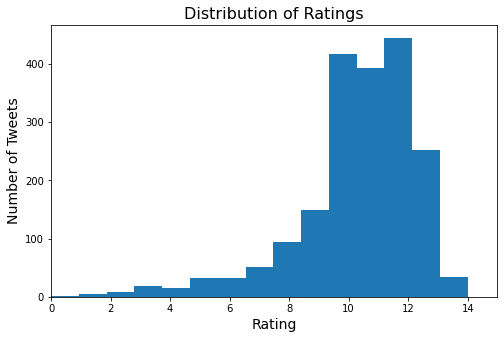

In [0]:
we_rate_dogs['rating'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

The distribution of ratings is very skewed to the left. From the descriptive statistics above we see that 75% of all ratings are between 10 and 14 inclusive (the IQR is from 10 to 12).

In [0]:
# Percentage of tweets with rating of 10 and up
rating_10up_total = sum(we_rate_dogs.rating >= 10)
rating_10up_perc = round(rating_10up_total * 100 / we_rate_dogs.shape[0])
print("Number of tweets with rating 10+:  {}".format(rating_10up_total))
print("Percentage of tweets:                {}%".format(round(rating_10up_perc, 3)))

Number of tweets with rating 10+:  1542
Percentage of tweets:                79%


In [0]:
# How many tweets have favorite count <= retweet count?
sum(we_rate_dogs.favorite_count <= we_rate_dogs.retweet_count)

0

#### What is the most favourited tweet to date? Top 5?

In [0]:
we_rate_dogs.sort_values(by = 'favorite_count', ascending = False).head(5)

tweet_id  ...                                                                                                                                        text
762  744234799360020481  ...  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4                       
306  822872901745569793  ...  Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc                           
395  807106840509214720  ...  This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d                                                     
108  866450705531457537  ...  This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr        
797  739238157791694849  ...  Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC

[5 rows x 11 columns]

#### What is the most retweeted tweet to date? Top 5.

In [0]:
we_rate_dogs.sort_values(by = 'retweet_count', ascending = False).head(5)

tweet_id  ...                                                                                                                                        text
762  744234799360020481  ...  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4                       
797  739238157791694849  ...  Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC
395  807106840509214720  ...  This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d                                                     
306  822872901745569793  ...  Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc                           
58   879415818425184262  ...  This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY                                

[5 rows x 11 columns]

There are 4 tweets that are in the top 5 for both variables, but the most popular tweet is also the _same_ as the most retweeted tweet; it has been retweeted over 83,000 times and favourited over 164,000 times! 

#### What is the most common stage?

In [0]:
we_rate_dogs.stage.value_counts()

none       1649
pupper     200 
doggo      71  
puppo      23  
floofer    8   
Name: stage, dtype: int64

In [0]:
with_stage_sum = sum(we_rate_dogs.stage != 'none')
tweets_with_stage = round(with_stage_sum * 100 / we_rate_dogs.shape[0])
print("Number of tweets WITH stage:  {}".format(with_stage_sum))
print("Percentage of tweets:          {}%".format(round(tweets_with_stage, 3)))

Number of tweets WITH stage:  302
Percentage of tweets:          15%


Only a small proportion of tweets with dog stages identified.

#### What are the 10 most common breeds of dogs tweeted about? (Excluding the category 'none'.)

In [0]:
str = "Number of tweets with 'none' predicted breed:  {} ({}%)"
none_count = sum(we_rate_dogs.breed == 'none')
none_perc = none_count * 100 / we_rate_dogs.shape[0]
print(str.format(none_count, round(none_perc)))

str = "Number of distinct breeds:  {}"
print(str.format(len(we_rate_dogs.breed.unique())))

Number of tweets with 'none' predicted breed:  302 (15%)
Number of distinct breeds:  113


In [0]:
top10_breeds_count = \
we_rate_dogs[we_rate_dogs.breed != 'none'].breed.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / we_rate_dogs.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))

Breed and number of tweets
--------------------------
golden_retriever      154
Labrador_retriever    103
Pembroke              94 
Chihuahua             90 
pug                   62 
toy_poodle            50 
chow                  47 
Samoyed               41 
Pomeranian            40 
malamute              33 
Name: breed, dtype: int64

Top 10 dog breeds make up 37% of all tweets


In [0]:
plt.barh(top10_breeds_count.index, top10_breeds_count)

plt.xlabel('Number of Tweets', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

The bar chart above shows that the most common dog that is tweeted about, with almost 160 tweets, is the Golden Retriever, as identified (predicted) by the neural network. Labrador Retrievers, Pembrokes and Chihuahuas are fairly close together in 2nd, 3rd, and 4th place. Further down we'll take a look at what are the most favourited dog breeds.

### Bivariate Analysis

In [0]:
sns.pairplot(we_rate_dogs, 
             vars = ['rating', 'retweet_count', 'favorite_count', 'confidence'], 
             diag_kind = 'kde', plot_kws = {'alpha': 0.2});

#### What dog breeds have the highest overall favourite counts?

In [0]:
fav_counts_breed = we_rate_dogs[we_rate_dogs.breed != 'none']
fav_counts_breed = fav_counts_breed.groupby(['breed'])
fav_counts_breed = fav_counts_breed['favorite_count'].sum()
fav_counts_breed = fav_counts_breed.sort_values(ascending = False)
top10_breeds_fav_counts = fav_counts_breed.head(10)
top10_breeds_fav_counts

breed
golden_retriever      1887444
Labrador_retriever    1241894
Pembroke              1017644
Chihuahua             755370 
French_bulldog        589850 
Samoyed               543358 
chow                  436997 
cocker_spaniel        398924 
pug                   368502 
malamute              344208 
Name: favorite_count, dtype: int64

In [0]:
plt.barh(top10_breeds_fav_counts.index, top10_breeds_fav_counts, color = 'g')

plt.xlabel('Aggregate Favorite Count', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 12)
plt.title('Top 10 Dog Breeds by Aggregate Favorite Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

The plot above shows the top 10 dog breeds ranked by aggregate favourite counts. It looks very similar to the barplot ealier of top 10 dog breeds ranked by tweet, and in fact the top 4 dog breeds are the same. This also makes sense, as these dogs have the highest number of tweets.

Both groups have these 8 dog breeds in common:

In [0]:
list(set(top10_breeds_count.index) & set(top10_breeds_fav_counts.index))

['golden_retriever',
 'malamute',
 'Pembroke',
 'Labrador_retriever',
 'Samoyed',
 'pug',
 'chow',
 'Chihuahua']

#### How are ratings distributed within each of the dog breeds with highest favourite counts?

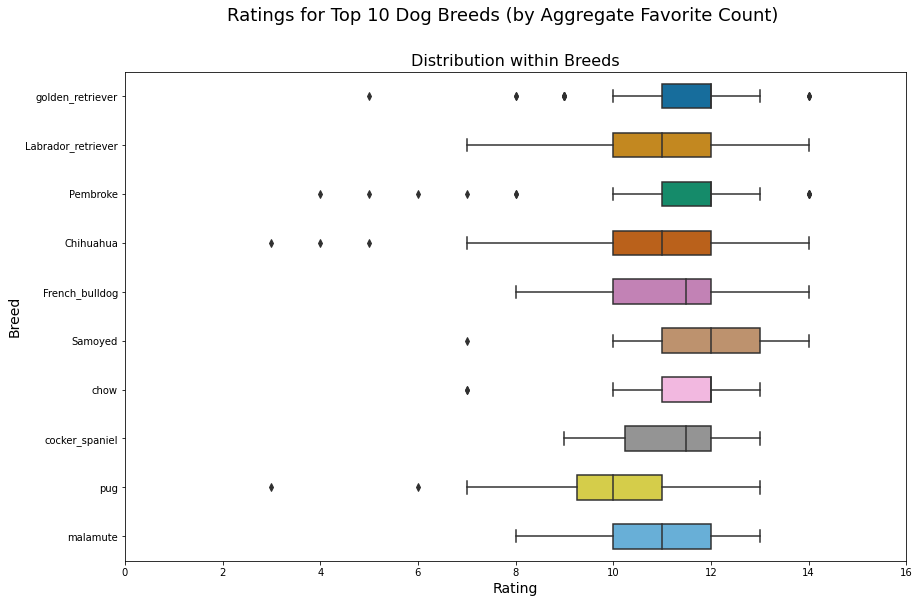

In [0]:
plt.figure(figsize = (14, 9))
bplot = sns.boxplot(y = 'breed', x = 'rating',
                    data = we_rate_dogs,
                    orient = 'h',
                    width = 0.5,
                    palette = "colorblind",
                    order = top10_breeds_fav_counts.index.tolist())
plt.xlim(0, 16)

# title and labels
plt.suptitle('Ratings for Top 10 Dog Breeds (by Aggregate Favorite Count)', fontsize = 18)
plt.title('Distribution within Breeds', fontsize = 16)
plt.ylabel("Breed",  fontsize = 14)
plt.xlabel('Rating',  fontsize = 14)
# plt.yticks(rotation = 60,  fontsize = 12)
plt.show()

The boxplot here shows the distribution of ratings within each of the top 10 dog breeds as ranked by aggregate favourite count. All the breeds range between 7 and 13, with a only a few outliers, while four of the breeds have the lower ratings at 10. Another four breeds have the highest ratings at 14.

#### How are tweet ratings distributed by day?

In [0]:
# Add random amount of float between [0.0:0.7) to input x
def jitter(x):
    random.seed()
    return x + random.uniform(0, 0.7)

In [0]:
# Return the number of days from a timedelta object x
def days_from_start(x):
    return x.days

# start date
first_day = we_rate_dogs.timestamp.min()

# array with days corresponding to timestamp
we_rate_dogs_days = (we_rate_dogs.timestamp - first_day).apply(days_from_start)

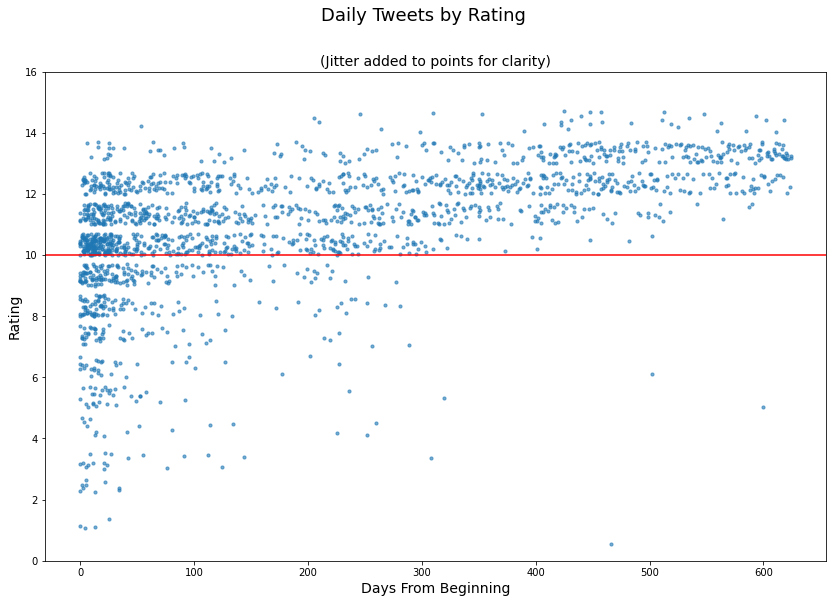

In [0]:
plt.figure(figsize = (14, 9))

# add jitter to the rating so it's not so cluttered on each line
rating_jitter = we_rate_dogs.rating.apply(jitter)

plt.scatter(we_rate_dogs_days, rating_jitter, s = 10, alpha = 0.6)

# title and labels
plt.suptitle('Daily Tweets by Rating', fontsize = 18)
plt.title('(Jitter added to points for clarity)', fontsize = 14)

plt.xlabel('Days From Beginning', fontsize = 14)
plt.ylabel('Rating', fontsize = 14)

# add the line at 10 for reference; ratings are out of 10
plt.axhline(y = 10, color = 'r')
plt.ylim(0, 16)

plt.show();

The plot here has the tweet ratings by day, showing how the ratings are generally over 10 in the latter half of the time period, after the account has been running for 300 days.

### Multivariate Analysis
#### Relationship between favourite and retweet counts with dog rating as colour.

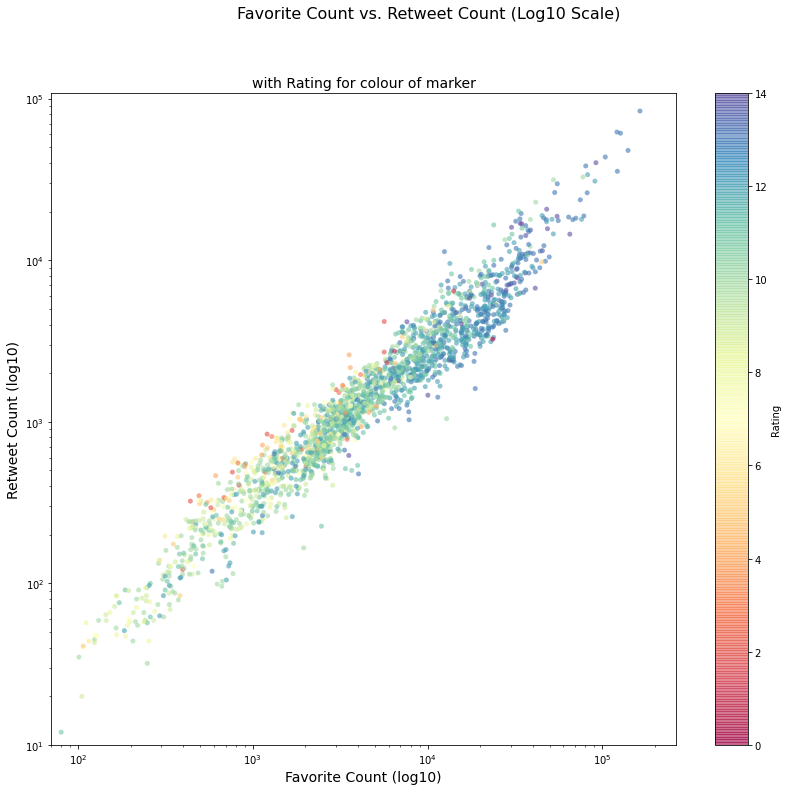

In [0]:
# Adapted from an answer from: 
# https://stackoverflow.com/questions/25741214/how-to-use-colormaps-to-color-plots-of-pandas-dataframes
# -------------------------------------------------------------------------

df = we_rate_dogs

cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 12))

plt.xscale('log')
plt.yscale('log')
plt.xlim(df['favorite_count'].min() - 10, df['favorite_count'].max() + 100000)
plt.ylim(10, df['retweet_count'].max() + 25000)
colours = df['rating']
markers = 25

plt.scatter(df['favorite_count'], df['retweet_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.6)

# title and labels
plt.suptitle('Favorite Count vs. Retweet Count (Log10 Scale)', fontsize = 16)
plt.title('with Rating for colour of marker', fontsize = 14)
plt.xlabel('Favorite Count (log10)', fontsize = 14)
plt.ylabel('Retweet Count (log10)', fontsize = 14)

# colour bar
cbar = plt.colorbar()
cbar.set_label('Rating')

plt.show();

This plot is showing a few things here, but the overall picture is the strong positive correlation between retweet counts and favorite counts. It does make sense though, personally, if I 'like' a tweet (favourite it) I am more likely to retweet it as well. The tightly packed points follow a distinct linear trend with a positive slope, so as favorite count increases so does the retweet count. Also evident, tweets with high favorite counts and high retweet counts also have higher ratings, as shown by the concentration of blue points.

#### Favourite counts over time, with dog rating as colour.

In [0]:
# Adapted from an answer from: 
# https://stackoverflow.com/questions/25741214/how-to-use-colormaps-to-color-plots-of-pandas-dataframes
# -------------------------------------------------------------------------

cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 10))

plt.yscale('log')
plt.ylim(we_rate_dogs['favorite_count'].min() - 10, 
         we_rate_dogs['favorite_count'].max() + 100000)
colours = we_rate_dogs['rating']
markers = 25

plt.scatter(we_rate_dogs_days, we_rate_dogs['favorite_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.7)

# title and labels
plt.suptitle('Daily Tweets by Favorite Count (Log10 Scale)', fontsize = 16)
plt.title('with Rating for colour of marker', fontsize = 14)
plt.xlabel('Days From Beginning', fontsize = 14)
plt.ylabel('Favorite Count (log10)', fontsize = 14)

cbar = plt.colorbar()
cbar.set_label('Rating')
plt.show();

In this plot the x-axis scale is reversed showing time in the past, and moving forward from left to right. Clearly, the more recent tweets (younger/fewer days old on the right side) are rated consistently higher (blue and green) than much older tweets (yellow and green). Also interesting is that tweets older than 1100 days have lower favourite counts; this is most likely because this was at the start of the twitter account, and so there weren't as many followers at the time.

The slope of the line is also increasing at a steady rate from around 1100 days, reflecting the daily increase in tweets being favourited. This clearly shows that the twitter account followers were active, and possibly growing, during the timeframe represented in the archive.

The older tweets also have much more variability in ratings as seen by the range of colours (more yellow and green), and also in the range of favorite_count.